<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/piercel_week2_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Pierce Lopez <br>
**Date Created**: August 15, 2020 <br>
**Last Updated**: August 16, 2020 <br> 
**Description**: Contains some applications of Week 2 lessons on the Customs dataset. 

Some preliminary notes about the Customs dataset columns: 

<br>

<ins>*Identification Variables*</ins>: <br>
**uid** - unique identification number for each import transaction <br>
* 2012-2013 format: yyyyqq nnnnnnnn (i.e. 2012q1 00000001): quarterly <br>
* 2014-2019 format: yyyymm nnnnnnnn (i.e. 201401 00000001): monthly

<ins>*Time Variables*</ins>: <br>
**ty** - year of import transaction <br>
**tq** - year and quarter of import transaction
* human readable format: yyyyqn (i.e 2012q1 - first quarter of 2012) <br>

**tm** - year and month of import transaction
* human readable format: yyyymn (i.e. 2014m10 - October 2012(?) 2014)
* NOTE: blank for 2012-2013 since data was recorded quarterly

<ins>*Entry Type Variables*</ins>: <br>
**entry** - act, documentation, and process of bringing imported goods into the customs territory
* C - consumption: domestic use; tax imposed
* W - customs bonded warehousing: kept and exempted from duties and taxes
* T - transshipment or transit: further shipped to another port/country
* C-Temp - consumption-temporary
* . - unspecified or missing entry: August 2014; September 2017 - December 2019
  * 2012-2013 (import entries assumed to be C)

<ins>*Product Variables*</ins>: <br>
**hscode** - 11-digit product classification of a good; marker of imposed tariffs
* i.e. 10 - cereals
  * 1006 - rice
  * 100610 - rice in the husk

**goodsdescription** - description of the imported goods

<ins>*Price Variables*</ins>: <br>
**p** - USD price per kg of import transaction.

<ins>*Quantity Variables*</ins>: <br>
**q** - mass of import transaction in kg

<ins>*Value Variables*</ins>: <br>
**m_fob** - USD free on board value estimate of the import transaction <br>
**m_cif** - USD cost, insurance, and freight value estimate of the import transaction <br>
**fx_usd** - weighted average exchange rate from foreign currency units (FCU) to USD for a given time period
* 2012-2013: quarterly
* 2014-2019: monthly

**dutiablevalueforeign** - dutiable import value 
* can be estimated by adding customsvalue, freight, and insurance

**exchangerate** - exchange rate from FCU to PHP <br>
**currency** - the denomination currency of the import transaction <br>
**dutiablevaluephp** - dutiable import value in PHP

<ins>*Duty and Tax Variables*</ins>: <br>
**dutypaid** - customs duties paid on the transaction in PHP <br>
**exciseadvalorem** - excise and/or ad valorem taxes paid on the transaction in PHP <br>
**arrastre** - amount in PHP owner has to pay for handling, receiving, and custody of their merchandise <br>
**wharfage** - port facility usage fee in PHP <br>
**vatbase** - value-added tax base in PHP
* can be estimated by adding dutiablevaluephp, dutypaid, exciseadvalorem, arrastre, wharfage, and other charges <br>

**vatpaid** - value-added tax paid on the transaction in PHP <br>
**othertax** - other taxes paid on the transaction in PHP <br>
**finesandpenalties** - fines and penalties paid on the transaction in PHP <br>
**dutiestaxes** - total duties and taxes paid on the transaction in PHP
* can be estimated by adding dutypaid, exciseadvalorem, vatpaid, finesandpenalties, and othertax

<ins>*Trade Agreement Variables*</ins>: <br>
**prefcode** - preferential trade agreement used for the transaction
* AFTA:	 ASEAN Free Trade
* ACFTA:	 ASEAN-China Free Trade Agreement
* JPEPA:	 Philippines-Japan Economic Partnership Agreement
* ANFTA:	 ASEAN-Australia-New Zealand Free Trade Agreement
* AKFTA:	 ASEAN-Korea Free Trade Agreement
* BOI:	 Board of Investments
* AFMA:	 (?) Agriculture and Fisheries Modernization Act (?)
* AIFTA:	 ASEAN-India Free Trade Agreement
* AJCEP:	 ASEAN-Japan Comprehensive Economic Partnership Agreement
* EFTA:	 Philippines-European Free Trade Association Free Trade Agreement
* AICO:	 ASEAN Industrial Cooperation Scheme
* APTA:	 (?) Asia Pacific Trade Agreement (?)
* AIJV:	 ASEAN Industrial Joint Venture

<ins>*Country Variables*</ins>: <br>
**countryorigin_iso3** - country of origin of the transaction <br>
**countryexport_iso3** - country of export of the transaction

<ins>*Port Variables*</ins>: <br>
**subport** - name of subport of entry <br>
**port** - name of major port of entry

In [2]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# check if the directories and files exist in My Drive
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

boc_lite_2012_2019_top9_hscode.csv  boc_lite_2014.csv  boc_lite_2017.csv
boc_lite_2012.csv		    boc_lite_2015.csv  boc_lite_2018.csv
boc_lite_2013.csv		    boc_lite_2016.csv  boc_lite_2019.csv


In [1]:
%cd drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv


In [5]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import random
import gc

***Focusing on a dataset first***

In [3]:
# load the 2016 dataset
dat2016 = pd.read_csv("boc_lite_2016.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# info regarding the dataset
print(dat2016.info())

# first and last few rows of the dataset
print(dat2016.head())
print(dat2016.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140436 entries, 0 to 3140435
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   uid                   object 
 1   ty                    int64  
 2   tq                    object 
 3   tm                    object 
 4   entry                 object 
 5   hscode                int64  
 6   goodsdescription      object 
 7   p                     float64
 8   q                     float64
 9   m_fob                 float64
 10  m_cif                 float64
 11  fx_usd                float64
 12  dutiablevalueforeign  float64
 13  exchangerate          float64
 14  currency              object 
 15  dutiablevaluephp      int64  
 16  dutypaid              int64  
 17  exciseadvalorem       float64
 18  arrastre              float64
 19  wharfage              float64
 20  vatbase               int64  
 21  vatpaid               int64  
 22  othertax              float64
 23  finesan

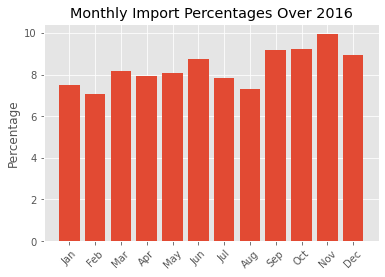

In [6]:
# imports per month (percentages over a year)
tm = pd.DataFrame(dat2016["tm"].value_counts(normalize = True)) * 100

# changing indices
new_index = []
for index in tm.index.str.replace("2016m",""):
  new_index.append(int(index))
tm["month"] = new_index

# sorting indices
tm_sorted = tm.reset_index(drop = True).set_index("month").sort_index()

# plot monthly imports
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.bar(tm_sorted.index, tm_sorted["tm"])
ax.set_title("Monthly Import Percentages Over 2016")
ax.set_xticks(tm_sorted.index)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 
                    rotation = 45)
ax.set_ylabel("Percentage")
plt.show()

In [16]:
# make a new column multiplying p and q to get actual value of the good
dat2016["pq"] = dat2016["p"].multiply(dat2016["q"], axis = "rows")
print(dat2016[["p", "q", "pq"]].head())

# most expensive imported good per kg
print(dat2016[dat2016["p"] == dat2016["p"].max()]
      [["goodsdescription", "countryorigin_iso3", "p", "q"]])

# most expensive imported good as a whole
print(dat2016[dat2016["pq"] == dat2016["pq"].max()]
      [["goodsdescription", "countryorigin_iso3", "p", "q"]])

          p           q            pq
0  0.537500   1999417.0  1.074687e+06
1  0.537500   2999779.0  1.612381e+06
2  0.202685  10985729.0  2.226641e+06
3  0.307952   6686611.0  2.059155e+06
4  0.558910    860000.0  4.806626e+05
          goodsdescription countryorigin_iso3             p     q
1946602  A321-231 AIRCRAFT                CYM  6.254436e+09  0.01
       goodsdescription countryorigin_iso3           p     q
454428          GROMMET                THA  18948408.0  95.0


**HS Codes**

01-05  Animal & Animal Products <br>
06-15  Vegetable Products <br>
16-24  Foodstuffs <br>
25-27  Mineral Products <br>
28-38  Chemicals & Allied Industries <br>
39-40  Plastics / Rubbers <br>
41-43  Raw Hides, Skins, Leather, & Furs <br>
44-49  Wood & Wood Products <br>
50-63  Textiles <br>
64-67  Footwear / Headgear <br>
68-71  Stone / Glass <br>
72-83  Metals <br>
84-85  Machinery / Electrical <br>
86-89  Transportation <br>
90-97  Miscellaneous <br>

In [ ]:
print("Most imports are Machinery/Electrical goods!")
# finding out the hscode group with the most imports (in percentages)
dat2016["hscode"].value_counts(normalize = True) * 100

Most imports are Machinery/Electrical goods!


84733090000    1.320931
84799040000    1.060935
85429000000    0.960918
85415000000    0.931813
84799030000    0.809792
                 ...   
52054100000    0.000032
72173011000    0.000032
84863020000    0.000032
85198171000    0.000032
6039000000     0.000032
Name: hscode, Length: 8779, dtype: float64

In [ ]:
# scatterplot of country imports
chn_dat = dat2016[dat2016["countryorigin_iso3"] == "CHN"]
print(chn_dat)

                     uid    ty  ...                        port            pq
2        201601 00000003  2016  ...                Port of Cebu  2.226641e+06
3        201601 00000004  2016  ...                Port of Cebu  2.059155e+06
7        201601 00000008  2016  ...              Port of Manila  9.776525e+05
8        201601 00000009  2016  ...              Port of Manila  1.894245e+04
9        201601 00000010  2016  ...              Port of Manila  5.367427e+05
...                  ...   ...  ...                         ...           ...
3140381  201612 00281215  2016  ...  Ninoy Aquino Int'l Airport  5.820000e+03
3140387  201612 00281221  2016  ...  Ninoy Aquino Int'l Airport  8.798428e+05
3140412  201612 00281246  2016  ...  Ninoy Aquino Int'l Airport  2.000000e+02
3140419  201612 00281253  2016  ...  Ninoy Aquino Int'l Airport  3.578000e+02
3140420  201612 00281254  2016  ...  Ninoy Aquino Int'l Airport  4.896000e+02

[812537 rows x 31 columns]


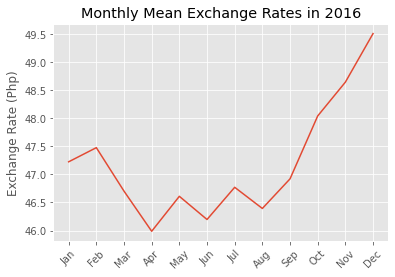

In [90]:
excrate_month_mean = dat2016.groupby("tm")[["exchangerate"]].mean()

# changing indices
new_index = []
for index in excrate_month_mean.index.str.replace("2016m",""):
  new_index.append(int(index))
excrate_month_mean["month"] = new_index

# sorting indices
excrate_month_mean_sorted = excrate_month_mean.reset_index(drop = True).set_index("month").sort_index()

# plot monthly imports
fig, ax = plt.subplots()
ax.plot(excrate_month_mean_sorted.index, excrate_month_mean_sorted)
ax.set_title("Monthly Mean Exchange Rates in 2016")
ax.set_xticks(excrate_month_mean_sorted.index)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 
                    rotation = 45)
ax.set_ylabel("Exchange Rate (Php)")
plt.show()


In [22]:
# filling missing values with 0.0
dat2016[["dutypaid", 
         "exciseadvalorem", 
         "vatpaid", 
         "finesandpenalties", 
         "othertax"]] = dat2016[["dutypaid", 
                                 "exciseadvalorem", 
                                 "vatpaid", 
                                 "finesandpenalties", 
                                 "othertax"]].fillna(0)

# checking if estimations match
# print(dat2016["dutiestaxes"] == (dat2016["dutypaid"] + 
#                                  dat2016["exciseadvalorem"] + 
#                                  dat2016["vatpaid"] + 
#                                  dat2016["finesandpenalties"] + 
#                                 dat2016["othertax"]))

# finding transactions with non-matching estimations
non_matching_taxes = dat2016[(dat2016["dutiestaxes"] == (dat2016["dutypaid"] + 
                                                         dat2016["exciseadvalorem"] + 
                                                         dat2016["vatpaid"] + 
                                                         dat2016["finesandpenalties"] + 
                                                         dat2016["othertax"])) == False]

# making a new column to hold the estimates
non_matching_taxes["estimation"] = ((non_matching_taxes["dutypaid"] + 
                                    non_matching_taxes["exciseadvalorem"] + 
                                    non_matching_taxes["vatpaid"] + 
                                    non_matching_taxes["finesandpenalties"] + 
                                    non_matching_taxes["othertax"]))

# making a new column to hold the discrepancies
non_matching_taxes["discrepancy"] = (non_matching_taxes["dutiestaxes"] -
                                     non_matching_taxes["estimation"])

# finding out how far away the estimations are in non-matching cases (the discrepancies are large though omg)
print(non_matching_taxes[["dutiestaxes", "estimation", "discrepancy"]].sort_values("discrepancy", ascending = False).head(10))
print(non_matching_taxes[["discrepancy", "goodsdescription", "countryorigin_iso3"]].sort_values("discrepancy", ascending = False).head(10))

         dutiestaxes   estimation  discrepancy
1950315    253963332   36028929.0  217934403.0
1147083    220986943   35724791.0  185262152.0
1950961    196984473   27635573.0  169348900.0
1416066    190406278   31599369.0  158806909.0
1813052    174155922   24573187.0  149582735.0
651691     145314062   19473060.0  125841002.0
1149263    204289866   78495911.0  125793955.0
1614300    231840553  107758355.0  124082198.0
1950636    215998999  100030543.0  115968456.0
1418874    140666441   25179921.0  115486520.0
         discrepancy  ... countryorigin_iso3
1950315  217934403.0  ...                IDN
1147083  185262152.0  ...                IDN
1950961  169348900.0  ...                IDN
1416066  158806909.0  ...                IDN
1813052  149582735.0  ...                IDN
651691   125841002.0  ...                IDN
1149263  125793955.0  ...                KOR
1614300  124082198.0  ...                IDN
1950636  115968456.0  ...                IDN
1418874  115486520.0  ...        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


There are 207 different importer countries.
CHN    812537
JPN    567523
USA    294763
SGP    270877
KOR    165165
Name: countryorigin_iso3, dtype: int64


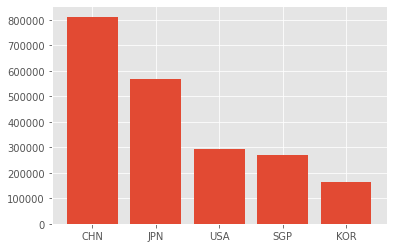

In [ ]:
# unique country exporters
importers = dat2016["countryorigin_iso3"]
print("There are " + str(importers.unique().shape[0]) + " different importer countries.")

# number of exports top countries made
importer_count = importers.value_counts().head()
print(importer_count)

# plot top 5
plt.bar(importer_count.index, importer_count)
plt.show()

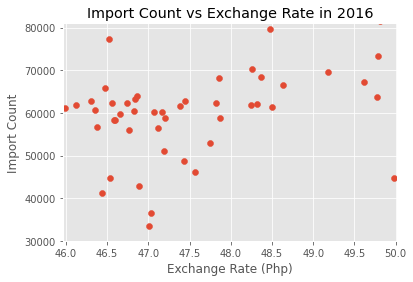

In [108]:
# scatter plot for exchange rate and number of imports
dat2016["exchangeraterounded"] = dat2016["exchangerate"].round(2)
excrate_round = dat2016.groupby("exchangeraterounded")[["countryorigin_iso3"]].count()

fig, ax = plt.subplots()
ax.scatter(excrate_round.index, excrate_round)
ax.set_title("Import Count vs Exchange Rate in 2016")
ax.set_xlabel("Exchange Rate (Php)")
ax.set_ylabel("Import Count")
ax.set_xlim((45.96, 50.02))
ax.set_ylim((30000, 81000))
plt.show()

Now we look at multiple datasets

In [7]:
# concatenate multiple datasets (in batches)
df = []
for filename in glob.glob("boc_lite_201?.csv")[2:4]:
  dat = pd.read_csv(filename, encoding = "ISO-8859-1")
  df.append(dat[["ty", "tq", "exchangerate", "countryorigin_iso3"]])
  gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
for filename in glob.glob("boc_lite_201?.csv")[4:6]:
  dat = pd.read_csv(filename, encoding = "ISO-8859-1")
  df.append(dat[["ty", "tq", "exchangerate", "countryorigin_iso3"]])
  gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
for filename in glob.glob("boc_lite_201?.csv")[6:8]:
  dat = pd.read_csv(filename, encoding = "ISO-8859-1")
  df.append(dat[["ty", "tq", "exchangerate", "countryorigin_iso3"]])
  gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# concatenate appended batches into a DataFrame
df = pd.concat(df)

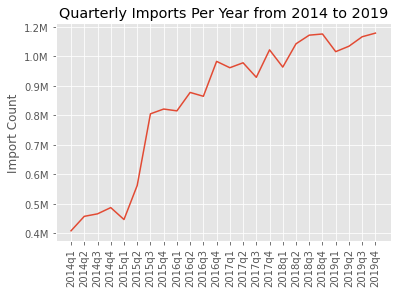

In [37]:
# count number of imports per year
import_year = df.groupby("tq")[["countryorigin_iso3"]].count()

fig, ax = plt.subplots()
ax.plot(import_year.index, import_year)
ax.set_title("Quarterly Imports Per Year from 2014 to 2019")
ax.set_ylabel("Import Count")
ax.set_xticklabels(import_year.index, rotation = 90)
ax.set_yticklabels(["0.3M", "0.4M", "0.5M", "0.6M", "0.7M",
                    "0.8M", "0.9M", "1.0M", "1.2M"])
plt.show()

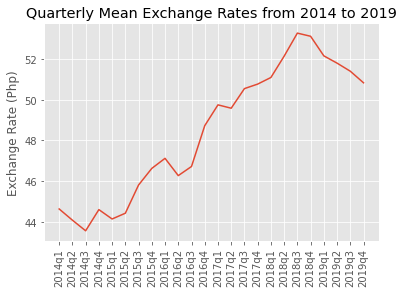

In [89]:
# get exchange rates from 2014 - 2019
exc_rate_14to19 = df.groupby("tq")[["exchangerate"]].mean()

fig, ax = plt.subplots()
ax.plot(exc_rate_14to19.index, exc_rate_14to19)
ax.set_title("Quarterly Mean Exchange Rates from 2014 to 2019")
ax.set_xticklabels(exc_rate_14to19.index, rotation = 90)
ax.set_ylabel("Exchange Rate (Php)")
plt.show()

In [12]:
# count number of import by country per year
import_cty = df.groupby("ty")["countryorigin_iso3"].value_counts()

import_cty_2014 = pd.DataFrame(import_cty.loc[[2014],:])
import_cty_2014 = import_cty_2014.rename(columns = {"countryorigin_iso3":"importcount"})
import_cty_2014 = import_cty_2014.reset_index()
import_cty_2014.drop("ty", axis = 1, inplace = True)
import_cty_2014.set_index("countryorigin_iso3", inplace = True)

import_cty_2019 = pd.DataFrame(import_cty.loc[[2019],:])
import_cty_2019 = import_cty_2019.rename(columns = {"countryorigin_iso3":"importcount"})
import_cty_2019 = import_cty_2019.reset_index()
import_cty_2019.drop("ty", axis = 1, inplace = True)
import_cty_2019.set_index("countryorigin_iso3", inplace = True)

In [13]:
# reindexing
Top5 = ["CHN", "JPN", "USA", "SGP", "KOR"]
import_cty_2014 = import_cty_2014.head().reindex(Top5)
import_cty_2019 = import_cty_2019.head().reindex(Top5)
print(import_cty_2014)
print(import_cty_2019)

                    importcount
countryorigin_iso3             
CHN                      447574
JPN                      133712
USA                      123868
SGP                      138685
KOR                       58934
                    importcount
countryorigin_iso3             
CHN                     1055807
JPN                      636695
USA                      352688
SGP                      313524
KOR                      183762


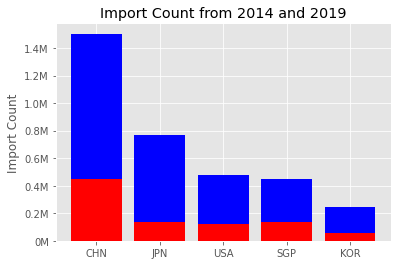

In [14]:
# creating stacked bar chart
fig, ax = plt.subplots()
ax.bar(import_cty_2014.index, 
       import_cty_2014["importcount"],
       color = 'r')
ax.bar(import_cty_2019.index, 
       import_cty_2019["importcount"], 
       bottom = import_cty_2014["importcount"],
       color = 'b')
ax.set_title("Import Count from 2014 and 2019")
ax.set_ylabel("Import Count")
ax.set_yticklabels(["0M", "0.2M", "0.4M", "0.6M",
                    "0.8M", "1.0M", "1.2M", "1.4M"])
plt.show()

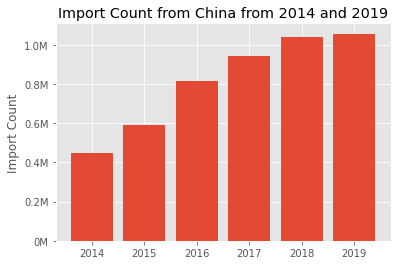

In [88]:
# Looking at top exporting country (China)
df_chn = df[df["countryorigin_iso3"] == "CHN"]
import_count_china = df_chn.groupby("ty")[["countryorigin_iso3"]].count()
import_count_china

fig, ax = plt.subplots()
ax.bar(import_count_china.index, import_count_china["countryorigin_iso3"],)
ax.set_title("Import Count from China from 2014 and 2019")
ax.set_ylabel("Import Count")
ax.set_yticklabels(["0M", "0.2M", "0.4M", "0.6M",
                    "0.8M", "1.0M"])
plt.show()